In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [2]:
df = pd.read_csv('../data/measuredAngles.csv')
df.head(9)

,Blade No.,Measured Angles
0,1,1.780078
1,2,1.909625
2,3,1.714951
3,4,1.797712
4,5,1.750724
5,6,2.028946
6,7,1.882012
7,8,1.710417
8,9,2.008980


In [3]:
df['Measured Angles'].std()

0.12071895944403267

In [4]:
df['Measured Angles'].mean()

1.842605

In [5]:
data_points = 8

In [6]:
df.index

RangeIndex(start=0, stop=9, step=1)

In [16]:
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60])

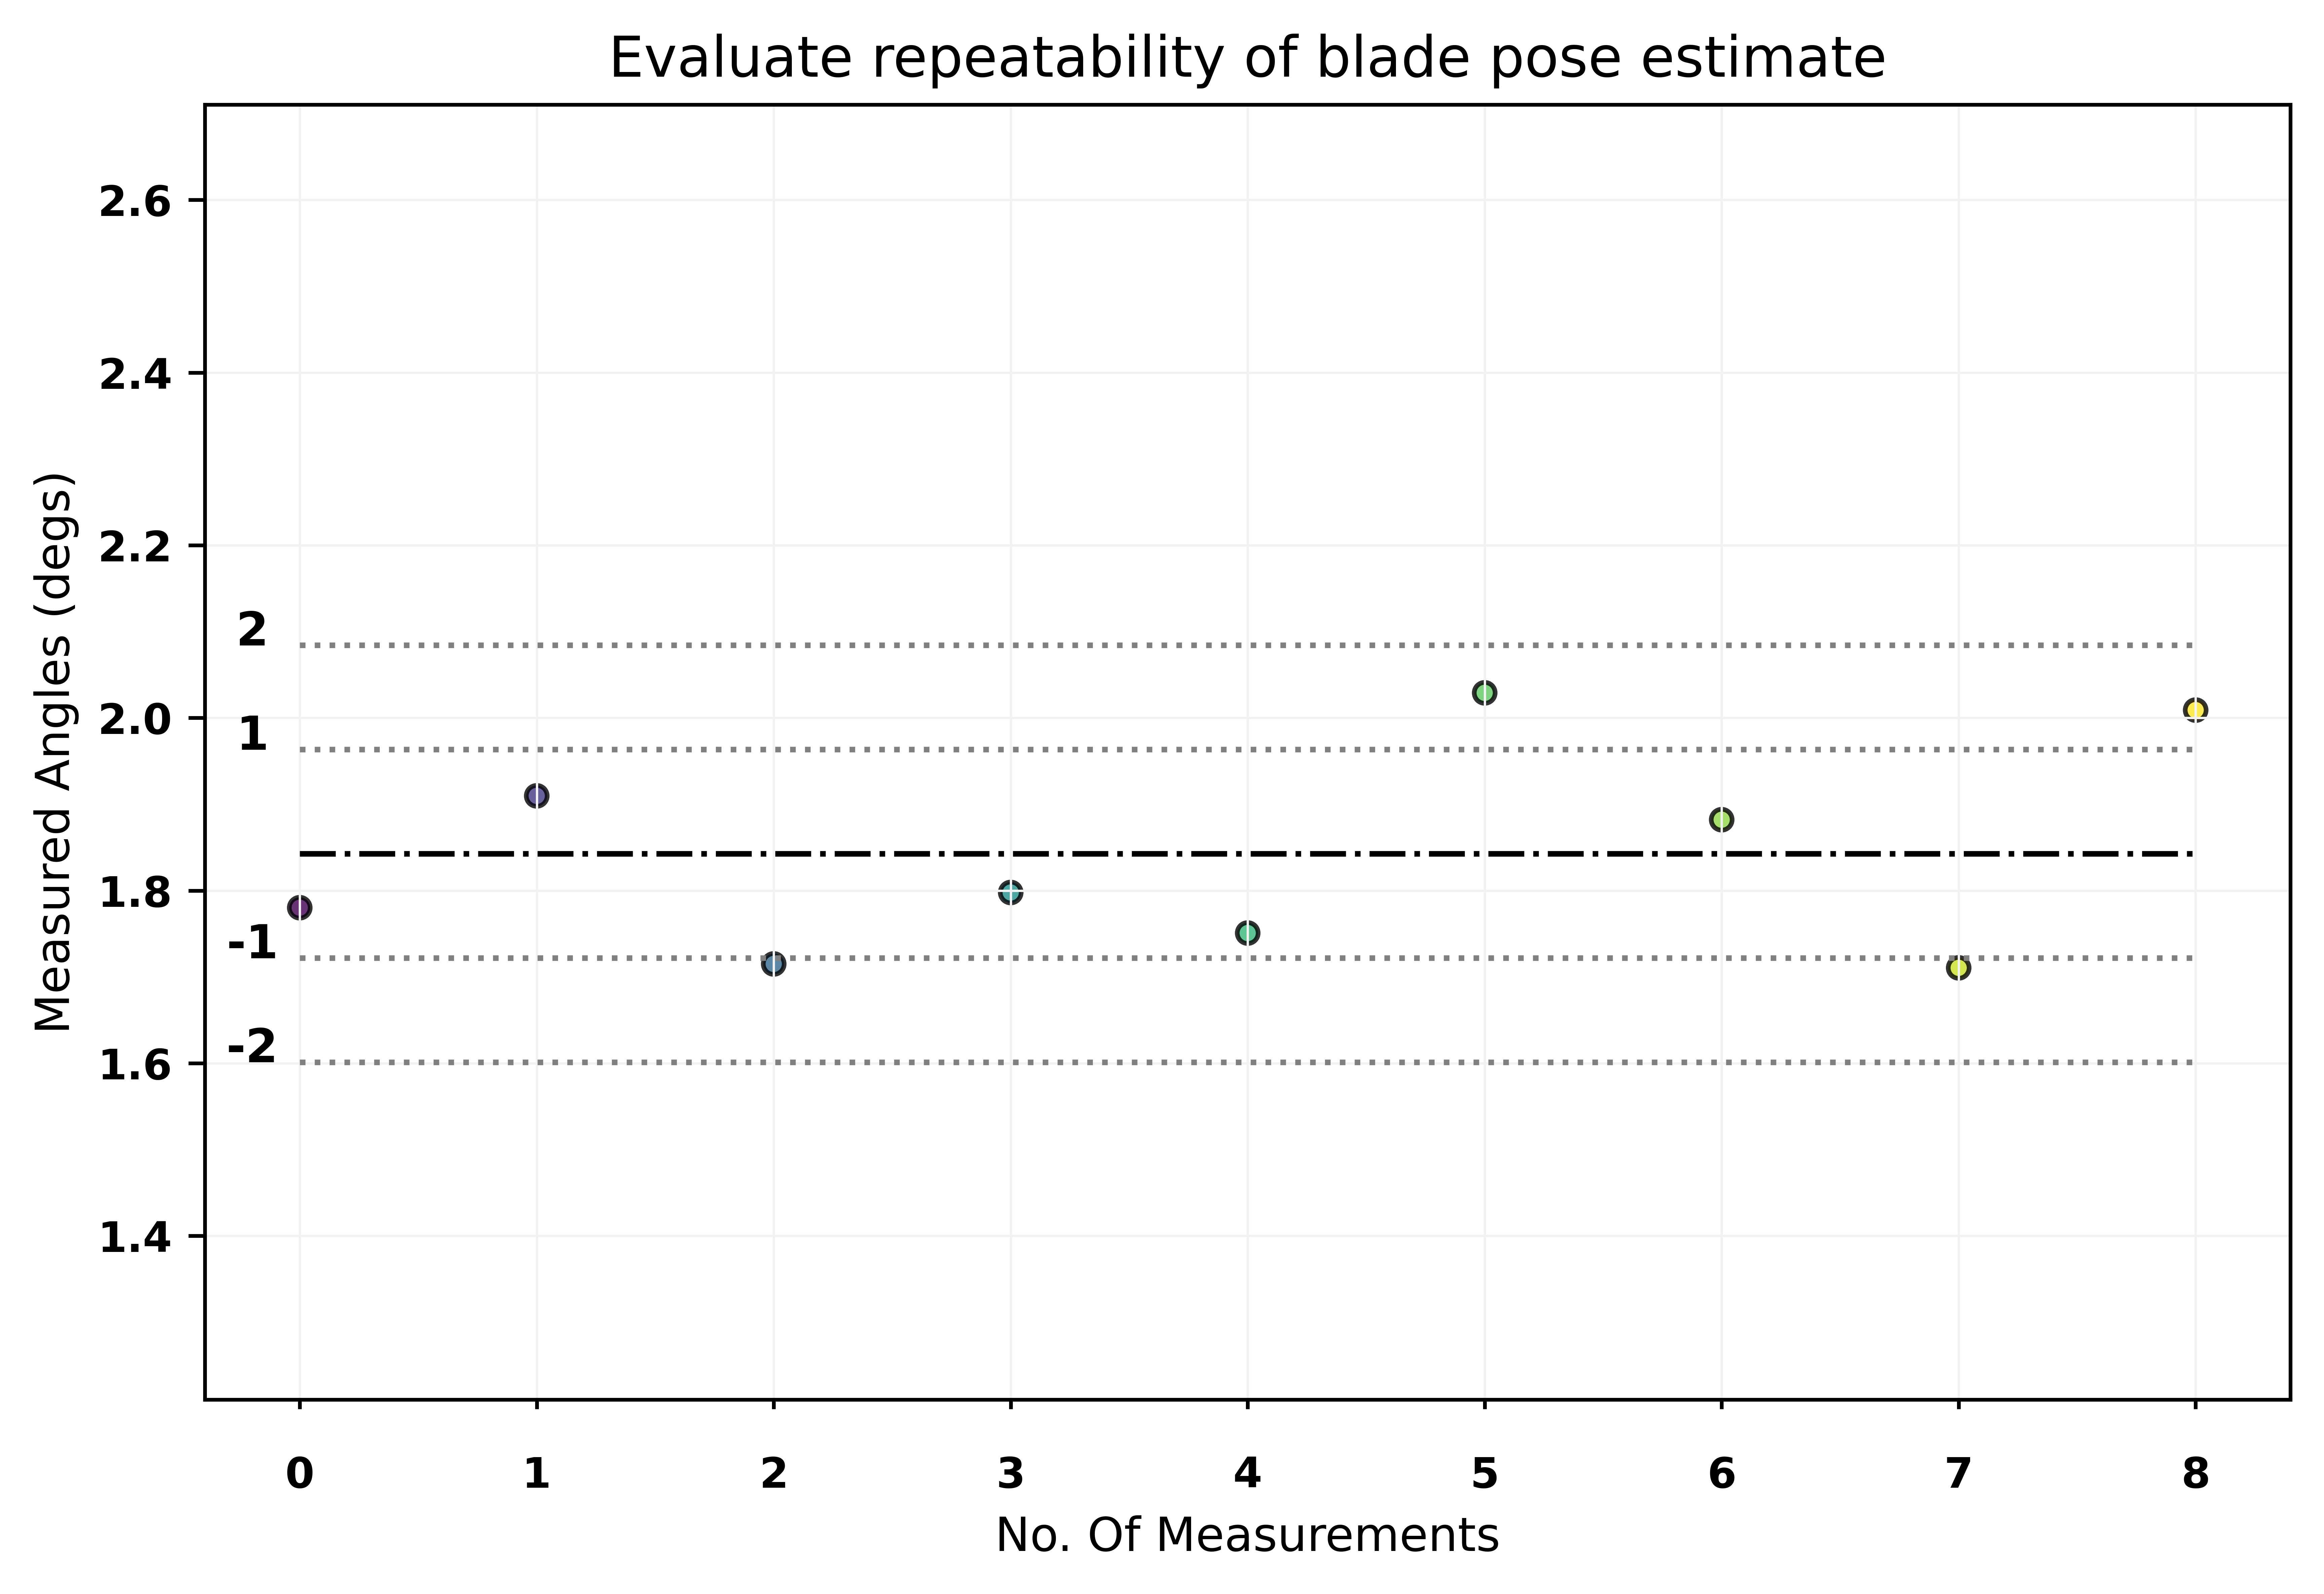

In [22]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
    
})

plt.figure(figsize=(8,5),dpi=1000)
plt.title("Evaluate repeatability of blade pose estimate") # Title
plt.ylim(df['Measured Angles'].min()-0.5,df['Measured Angles'].min()+ 1) # Setting y limits
plt.scatter(x=df.index, y=df['Measured Angles'], s=20,c=colors,cmap = 'viridis',marker="o",alpha=0.8,edgecolors='Black'); # Plotting scatter
plt.hlines(y=df['Measured Angles'].mean(), xmin=0, xmax=data_points,colors='Black',linestyles='dashdot') # Mean
plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("Measured Angles (degs)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
for std_int in [-2, -1, 1, 2]: # Going through different stds from the mean
    standard_deviation = df['Measured Angles'].mean() + df['Measured Angles'].std()*std_int
    
    plt.hlines(y=standard_deviation,
               xmin=0,
               xmax=data_points,
               linestyles='dotted',
               colors='gray',); # 1 std above
    
    # Giving labels to the lines we just drew
    plt.text(y=standard_deviation , x=-0.2, s=std_int, ha='center')